##


# Designing a Full Adder with McCulloch-Pitts Neuron

In this question, we aim to build, similar to the figure below, a Full Adder with two 2-bit inputs (ignoring the carry input bit for the moment).

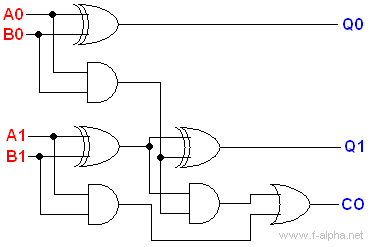

In this task, we get acquainted with the McCulloch–Pitts neuron. In this model, the neuron’s activation is binary: the neuron is either active (1) or inactive (0). Each neuron has a threshold: if the weighted sum of inputs exceeds the threshold, the neuron fires; otherwise, it does not. The structure of this neuron is shown in Figure .



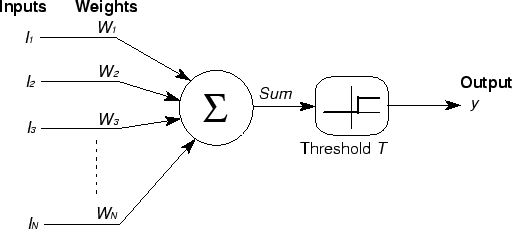




As shown in Figure 1, the neuron’s inputs are summed with specific weights, and if the sum exceeds the threshold, the neuron fires. The activation function is a step function.




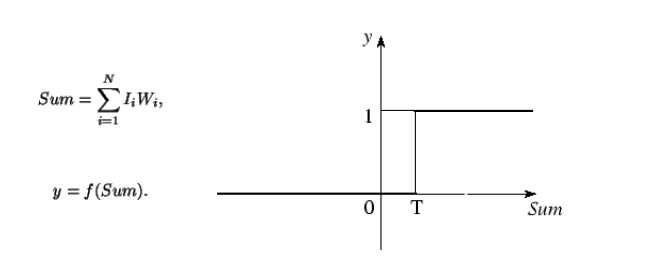




Initially, we will build simple logic gates: AND, XOR, and OR.
To implement XOR, we will use simpler gates OR and AND (and NOT, if needed).

In [69]:
import numpy as np
import pandas as pd

In [56]:
def AND(a, b):
    net = a + b - 2
    if net >= 0:
        c = 1
    else:
        c = 0
    return c

def AND_NOT(a, b):
    net =  -2 *a - b + 2
    if net >= 0:
        c = 1
    else:
        c = 0
    return c


def OR(a, b):
    net = 2 * a + 2 * b - 2
    if net >= 0:
        c = 1
    else:
        c = 0
    return c


def XOR(a, b):
    c = OR(AND_NOT(a, b), AND_NOT(b, a))
    return c




In [68]:
c0 = np.zeros((16,1))
s0 = np.zeros((16,1))
s1 = np.zeros((16,1))
a= np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,1,1]])
df = pd.DataFrame(a, columns=["A1", "A0", "B1", "B0"])
print(df)


    A1  A0  B1  B0
0    0   0   0   0
1    0   0   0   1
2    0   0   1   0
3    0   0   1   1
4    0   1   0   0
5    0   1   0   1
6    0   1   1   0
7    0   1   1   1
8    1   0   0   0
9    1   0   0   1
10   1   0   1   0
11   1   0   1   1
12   1   1   1   1


In [67]:
for i in range(len(a)):
  s0[i,0] = XOR(a[i,1],a[i,3])
  s1[i,0] = XOR(AND(a[i,3],a[i,1]), XOR(a[i,0],a[i,2]))
  c0[i,0] = OR(AND(AND(a[i,1],a[i,3]),XOR(a[i,0],a[i,2])), AND(a[i,0],a[i,2]))



data = [{'s1':s1[i,0], 's0':s0[i,0],'c':c0[i,0]} for i in range(16)]

df = pd.DataFrame(data)
print(df)

     s1   s0    c
0   1.0  1.0  0.0
1   1.0  1.0  0.0
2   1.0  1.0  0.0
3   1.0  1.0  0.0
4   1.0  1.0  0.0
5   0.0  0.0  1.0
6   1.0  1.0  0.0
7   0.0  0.0  1.0
8   1.0  1.0  0.0
9   1.0  1.0  0.0
10  1.0  1.0  1.0
11  1.0  1.0  1.0
12  1.0  0.0  1.0
13  0.0  0.0  0.0
14  0.0  0.0  0.0
15  0.0  0.0  0.0
